In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import linear_model, cross_validation
from sklearn.feature_selection import RFE
from sklearn import preprocessing

logistic_regression = linear_model.LogisticRegression()

### Load data files 

In [386]:
waves = pd.read_csv('../multiclass/Wavelength.csv', header=None)
x = pd.read_csv('../multiclass/X.csv', header=None)
y = pd.read_csv('../multiclass/y.csv', header=None)

### Setting key colour values

In [387]:
def decode_colours(toDecode):
    keys = {0: 'Blue', 1: 'Green', 2: 'Pink', 3: 'Red', 4: 'Yellow'}

    res = []
    for i in toDecode:
        res.append(keys[i])
        
    return res

### Set up plot parameters 

In [388]:
def plot_parameters(x, y):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = x
    fig_size[1] = y
    plt.rcParams["figure.figsize"] = fig_size

In [390]:
print(waves.size, x.size, y.size)

921 414450 450


### Drop records with NaN values if any exists

In [371]:
# Drop all rows that have NaN values
def drop_nan(waves, x, y):
    waves.dropna()
    x.dropna()
    y.dropna()
    
drop_nan(waves, x, y)

### Split data into training and testing sets 

In [392]:
flat_waves = waves.T.as_matrix(columns=None).flatten()
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.size, y_train.size)
print(x_test.size, y_test.size)

290115 315
124335 135


In [393]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.00000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,-0.962857,35.686952,-29.448984,36.589302,24.104952,-17.861778,4.987587,25.016603,6.011048,27.987683,...,25.00600,7.542635,15.849175,1.488476,18.300603,-2.988698,11.495143,8.995810,14.925651,34.256413
std,28.792072,39.186474,41.711323,17.475934,20.484712,24.453233,29.997530,26.111602,25.554519,23.702876,...,30.80835,35.663155,38.686184,42.754077,43.466269,53.776949,39.386215,37.857629,28.619245,25.528319
min,-74.140000,-92.590000,-132.000000,-12.860000,-32.810000,-84.620000,-72.790000,-64.190000,-79.430000,-44.400000,...,-32.68000,-57.770000,-57.650000,-74.730000,-55.770000,-92.670000,-60.730000,-73.420000,-38.540000,-15.760000
25%,-20.355000,9.185000,-57.185000,26.460000,10.025000,-35.300000,-16.285000,7.025000,-11.325000,11.795000,...,-4.84500,-28.365000,-22.080000,-43.660000,-27.035000,-57.745000,-25.620000,-27.515000,-13.250000,8.975000
50%,-0.730000,38.670000,-29.930000,36.210000,24.200000,-18.500000,4.700000,25.210000,5.040000,27.800000,...,34.34000,17.990000,29.060000,18.510000,32.070000,10.760000,24.050000,16.960000,24.340000,40.180000
75%,17.030000,59.335000,-1.190000,47.460000,38.380000,-2.730000,26.285000,43.535000,22.650000,43.385000,...,52.59000,38.960000,50.860000,37.965000,55.885000,42.765000,45.130000,43.140000,40.210000,56.835000
max,73.420000,157.780000,99.110000,97.300000,77.880000,49.170000,85.030000,111.630000,109.890000,109.440000,...,76.94000,71.670000,80.710000,75.300000,93.980000,113.160000,86.910000,78.080000,64.590000,89.020000


### Plot features 

In [382]:
def plot_training_data(x_train, y_train, waves):
#     plot_parameters(30, 10)
    index = 0
    y_train = y_train.as_matrix(columns=None)
    
    for ind, row in x_train.iterrows():
        if y_train[index] == 0:
            plt.plot(x_train.columns.values, row, color="blue")
        elif y_train[index] == 1:
            plt.plot(x_train.columns.values, row, color="lightgreen")
        elif y_train[index] == 2:
            plt.plot(x_train.columns.values, row, color="hotpink")
        elif y_train[index] == 3:
            plt.plot(x_train.columns.values, row, color="indianred")
        elif y_train[index] == 4:
            plt.plot(x_train.columns.values, row, color="yellow")    
        index += 1
    
    plt.xlabel("Feature index", fontdict=None, labelpad=None, fontsize=12)
    plt.ylabel("Optical reflectance intensity", fontdict=None, labelpad=None, fontsize=12)
    plt.yticks([-150, -100, -50, 0, 50, 100, 150], fontsize=12)  
    plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900], fontsize=12)  
    plt.xlim(xmin=0, xmax=921)

#     plt.axvspan(576, 577, color='grey', alpha=0.5)
    # plt.axvspan(513, 514, color='grey', alpha=0.5)

    plt.show()

In [383]:
plot_training_data(x_train, y_train, flat_waves)

AttributeError: 'numpy.ndarray' object has no attribute 'iterrows'

In [319]:
def plot_histogram(feature_index, x_train, y_train):
    plot_parameters(10, 10)
    blue = []
    green = []
    pink = []
    red = []
    yellow = []

    y_train = y_train.as_matrix(columns=None)

    index = 0
    for i in x_train[feature_index]:
        if y_train[index] == 0:
            blue.append(i)
        elif y_train[index] == 1:
            green.append(i)
        elif y_train[index] == 2:
            pink.append(i)
        elif y_train[index] == 3:
            red.append(i)
        elif y_train[index] == 4:
            yellow.append(i)
        index += 1

    plt.xlabel("Intencity values", fontdict=None, labelpad=None, fontsize=12)
    plt.ylabel("Number of intencity values", fontdict=None, labelpad=None, fontsize=12)
    # plt.hist([blue, green, pink, red], 100, alpha=1, color=["blue", "lightgreen", "pink", "red"])

    plt.hist([pink], 5, alpha=0.8, color=["pink"])
    plt.hist([blue], 5, alpha=0.8, color=["blue"])
    plt.hist([green], 5, alpha=0.8, color=["lightgreen"])
    plt.hist([red], 5, alpha=0.8, color=["indianred"])
    plt.hist([yellow], 5, alpha=0.8, color=["yellow"])

    plt.show()

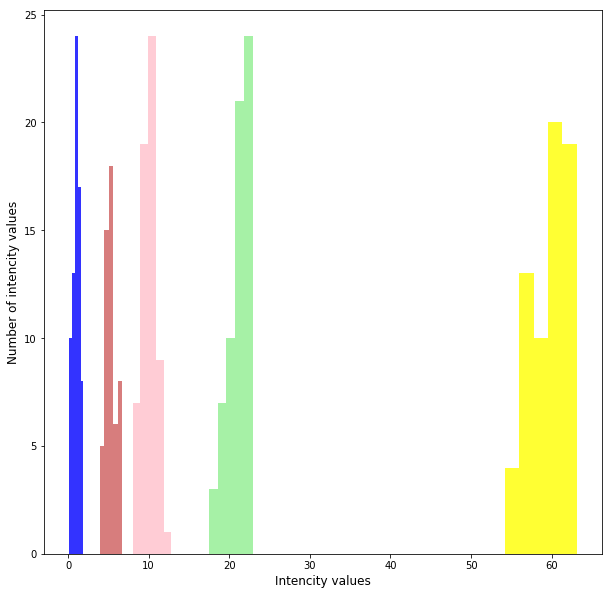

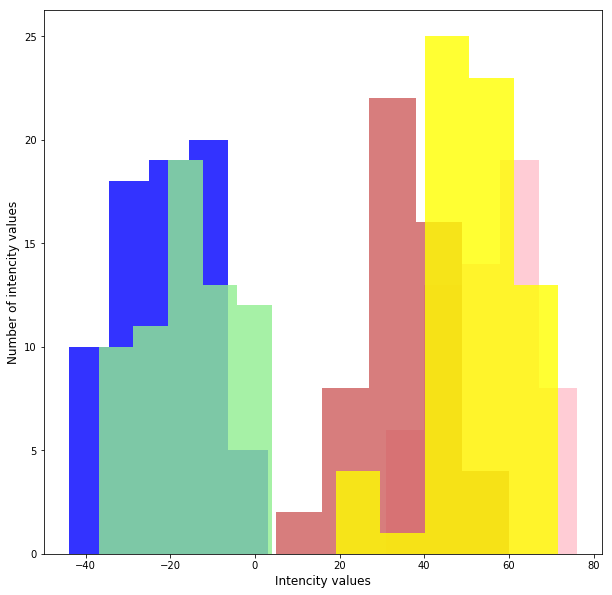

In [320]:
plot_histogram(400, x_train, y_train)
plot_histogram(900, x_train, y_train)

In [240]:
def one_feature_experiment(x_train, y_train):
    accuracies = []
    
    for i in x_train:
        x_one = x_train[i].values.reshape(-1, 1)
        logistic_regression.fit(x_one, y_train)
        y_res = logistic_regression.predict(x_one)
        accuracies.append(accuracy_score(y_train, y_res))

    return accuracies

In [ ]:
def plot_one_feature_exp_results(acc):
    plot_parameters(30, 10)
    plt.xlabel("Feature index", fontdict=None, labelpad=None, fontsize=12)
    plt.ylabel("Accuracy", fontdict=None, labelpad=None, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900], fontsize=12)  
    plt.xlim(xmin=0, xmax=921)
    
    index = 0
    for i in acc:
        if i > 0.9:
            plt.axvspan(index, index, color='pink', alpha=0.8)
        elif i > 0.8:
            plt.axvspan(index, index, color='pink', alpha=0.6)
        elif i > 0.7:
            plt.axvspan(index, index, color='pink', alpha=0.4)
        elif i > 0.6:
            plt.axvspan(index, index, color='pink', alpha=0.2)
        elif i > 0.5:
            plt.axvspan(index, index, color='pink', alpha=0.1)
        index += 1
        
    plt.plot(acc)

In [ ]:
acc = one_feature_experiment(x_train, y_train)
plot_one_feature_exp_results(acc)

In [ ]:
def get_true_indices(matrix):
    indices = []
    index = 0
    for i in matrix:
        if i == True:
            indices.append(index)
        index += 1
    return indices

In [35]:
def experiment(no_features):
    results = []
    
    for i in no_features:
        logistic = RFE(logistic_regression, i, step=1)
        logistic = logistic.fit(x_train, y_train)
        
        print(get_true_indices(logistic.support_))
        
        y_res = logistic.predict(x_train)
        accuracy = accuracy_score(y_train, y_res.ravel())
        
        print(accuracy)
        
        results.append(accuracy)
        
    return results

In [36]:
scores = experiment([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(scores)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[421]
0.8095238095238095


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[421, 429]
0.8507936507936508


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[250, 421, 429]
0.9968253968253968


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[250, 251, 421, 429]
0.9968253968253968


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[86, 250, 251, 421, 429]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[86, 250, 251, 421, 429, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[86, 88, 250, 251, 421, 429, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[66, 86, 88, 250, 251, 421, 429, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[66, 86, 88, 250, 251, 421, 429, 584, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[66, 86, 88, 250, 251, 421, 429, 584, 586, 914]
1.0
[0.8095238095238095, 0.8507936507936508, 0.9968253968253968, 0.9968253968253968, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [110]:
def plot_accuracies_REF(scores):
    no_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    plot_parameters(10, 10)
    plt.xlabel("Number of Features", fontdict=None, labelpad=None, fontsize=12)
    plt.ylabel("Accuracy", fontdict=None, labelpad=None, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(no_features, fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvspan(5, 5, color='pink', alpha=1)
    plt.plot(no_features, scores, color="royalblue")

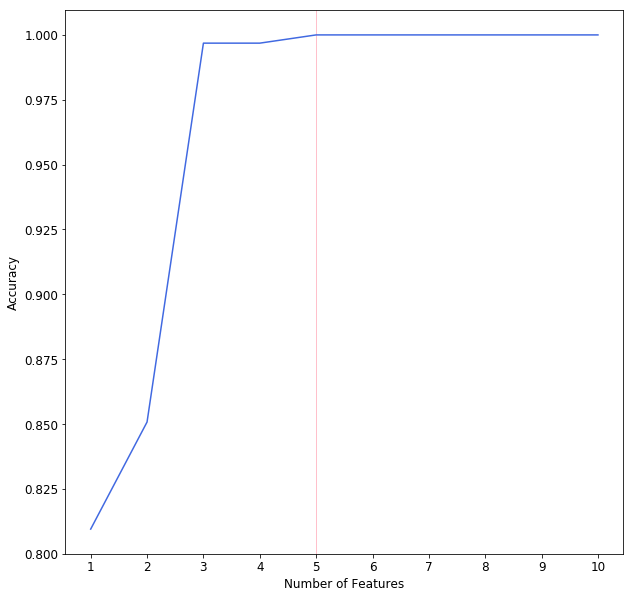

In [109]:
plot_accuracies_REF(scores)

In [13]:
def get_wave_values(waves, indices):
    values = []
    
    for i in indices:
        values.append(waves.iloc[[i]])
            
    return values

In [14]:
res = get_wave_values(waves, [66, 86, 88, 250, 251, 421, 429, 584, 586, 914])
res

[          0
 66  445.641,           0
 86  453.123,           0
 88  453.871,            0
 250  513.929,            0
 251  514.297,            0
 421  576.238,            0
 429  579.124,            0
 584  634.521,            0
 586  635.229,            0
 914  748.911]

In [340]:
def plot_confusion_matrix(cm, title='Confusion matrix - Training set', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1, 2, 3, 4], decode_colours([0, 1, 2, 3, 4]))
    plt.yticks([0, 1, 2, 3, 4], decode_colours([0, 1, 2, 3, 4]))
    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

### Selects only certain features/columns in dataframe 

In [323]:
def select_columns(x, selected):
    return x[selected]

x_train = select_columns(x_train, [421, 429, 250])
x_test = select_columns(x_test, [421, 429, 250])

In [ ]:
# def get_features(df, indices):
#     features = pd.DataFrame()

#     for i in indices:
#         a = df.iloc[:,i]
#         features[i] = a.as_matrix(columns=None)
        
#     return features

# b = x_train.iloc[:,indices[0]]
# features = get_features(x_train, indices)
# print(features)
# print(waves.iloc[[250]], waves.iloc[[421]], waves.iloc[[429]])

### Run linear logistic regression model - training set

In [347]:
logistic_regression.fit(x_train, y_train)
y_res = logistic_regression.predict(x_train)

print(accuracy_score(y_train, y_res))
print(classification_report(y_train, y_res))

0.9968253968253968
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        72
          1       0.98      1.00      0.99        65
          2       1.00      0.98      0.99        60
          3       1.00      1.00      1.00        52
          4       1.00      1.00      1.00        66

avg / total       1.00      1.00      1.00       315



/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrx for training set


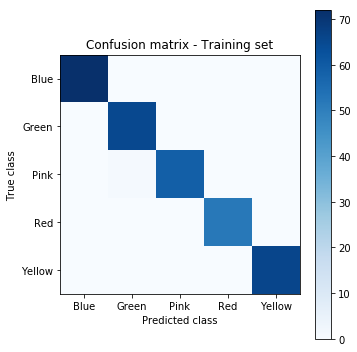

In [348]:
plot_parameters(5, 5)
cm = confusion_matrix(y_train, y_res)
np.set_printoptions(precision=1)

print("Confusion matrx for training set")
plot_confusion_matrix(cm)

### Linear Support Vector Classifier 

In [351]:
from sklearn import svm

svm_model = svm.SVC(C = 1.0)
svm_model.fit(x_train, y_train)
svc_predicted = svm_model.predict(x_train)

print(accuracy_score(y_train, svc_predicted))
print(classification_report(y_train, svc_predicted))

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        72
          1       1.00      1.00      1.00        65
          2       1.00      1.00      1.00        60
          3       1.00      1.00      1.00        52
          4       1.00      1.00      1.00        66

avg / total       1.00      1.00      1.00       315



/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrx for training set


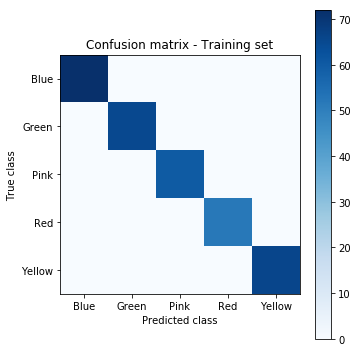

In [350]:
plot_parameters(5, 5)
cm = confusion_matrix(y_train, svc_predicted)
np.set_printoptions(precision=1)

print("Confusion matrx for training set")
plot_confusion_matrix(cm)

### Testing SVC on testin set

In [357]:
svc_predicted_test = svm_model.predict(x_test)

print(accuracy_score(y_test, svc_predicted_test))
print(classification_report(y_test, svc_predicted_test))

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       1.00      1.00      1.00        25
          2       1.00      1.00      1.00        30
          3       1.00      1.00      1.00        38
          4       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00       135



### Write to file function

In [358]:
def write_to_file(df, path):
    df.to_csv(path, encoding='utf-8', index=False)

### Final results to a file 'PredictedClasses.csv' 

In [394]:
to_clasify = pd.read_csv('../multiclass/XToClassify.csv', header=None)
X = select_columns(to_clasify, [421, 429, 250])
y_final_res = svm_model.predict(X)

print(y_final_res)
write_to_file(pd.DataFrame([y_final_res]), "../multiClassTask/PredictedClasses.csv")

[2 0 2 0 0 0 2 0 4 1 4 3 3 2 0 4 2 4 3 3 4 1 2 1 4 2 3 2 0 1 1 1 3 1 2 4 2
 3 1 4 0 0 1 1 3 0 3 4 3 4]
